In [1]:
#Importing Libraries
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

##**Context of Analysis**

There is a big competition between Internet providers. If a providers want to increase its revenue they needs more subscriber but keep existing customer is more important than having new ones. So, providers want to know which customer should cancel his service. If the provider cancel the service, that is called churn.

All industries suffer from voluntary churn -- the loss of customers to some other company. The survival of any business is based on its ability to retain customers. This is particularly true for phone, cable TV, satellite TV and wireless companies. How do you reduce churn? There are many ways: better products, better delivery methods, lower prices, building satisfactory customer relationships, better marketing and, above all, successful customer communications.

Wireless companies today measure voluntary churn by a monthly figure, such as 1.9 percent or 2.1 percent. This is the average number of customers who quit their service per month. Annual churn rates for telecommunications companies average between 10 percent and 67 percent.

Industry retention surveys have shown that while price and product are important, most people leave any service because of dissatisfaction with the way they are treated. They would not be looking around if they were happy with their current provider, its service and employees.

Churn reduction in the telecom industry is a serious problem, but there are many things that can be done to reduce it, and, with a customer database, many ways of measuring your success.

##**Data Gathering**

The dataset consist of the following features:  
1) is_tv_subscriber customer - has a tv subscription ?

2) is_movie_package_subscriber?

3) subscription_age - how many year has the customer use our service

4) bill_avg - last 3 months bill avg

5) reamining_contract - how many year remaining for customer contract. If null; customer didn't have a contract. the customer who has a contract time have to use their service until contract end.if they canceled their service before contract time end they pay a penalty fare.

6) is_contract - Two ways in which a customer could be using the services. One through a time-bound contract which costs less and another through a normal monthly subscription which obviously costs more. So, even if a person is not in a contract, he's still a user who's paying monthly fees.

7) service_failure_count customer - call count to call center for service failure for last 3 months

8) download_avg - average download speed (Mbps)

9) upload_avg last - average download speed (Mbps)

10) download_over_limit - most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months

In [2]:
#Import dataset
data_url = 'https://docs.google.com/spreadsheets/d/1Hhh0X_ujy7EjIXKXZtjd7XwxxiuVhbZVUFYnYLcU0zU/edit#gid=1657794996'
data_url_trf = data_url.replace('/edit#gid=', '/export?format=csv&gid=')
data = pd.read_csv(data_url_trf)
data

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


Data type is good

In [ ]:
data.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

The remaining_contract has blank values of 21,572 which means the customers never opted for contract. The blank values can be replaced with 0.  
Also, we create a new column called is_contract which shows whether the customer opted for contract or not.  
download_avg & upload_avg has 381 blank values which can be dropped for better results.

In [ ]:
test_cols = data.columns.tolist()
test_cols.insert(5, 'is_contract')

# Creating is_contract column
data['is_contract'] = data['reamining_contract'].apply(lambda x: 0 if pd.isna(x) else 1)

# Imputing null values with 0
data['reamining_contract'].replace(np.nan, 0, inplace=True)

# Rearranging columns
test_prepared = data[test_cols]
column_names = ['id','is_tv_subscriber','is_movie_package_subscriber','subscription_age','bill_avg','reamining_contract',
                'is_contract','service_failure_count','download_avg','upload_avg','download_over_limit','churn']

data = data.reindex(columns=column_names)

In [ ]:
data.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,1,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,1,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,0,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0,0.0,0.0,0,1


In [ ]:
data['subscription_age'].max()

12.8

In [ ]:
data['download_avg'].replace('', np.nan, inplace=True)
data['upload_avg'].replace('',np.nan, inplace=True)
data.dropna(subset=['download_avg'], inplace=True)
data.dropna(subset=['upload_avg'], inplace=True)

In [ ]:
data.isna().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
is_contract                    0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  int64  
 5   reamining_contract           71893 non-null  float64
 6   is_contract                  71893 non-null  int64  
 7   service_failure_count        71893 non-null  int64  
 8   download_avg                 71893 non-null  float64
 9   upload_avg                   71893 non-null  float64
 10  download_over_limit          71893 non-null  int64  
 11  churn                        71893 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 7.1 MB


##**Exploratory Data Analysis**

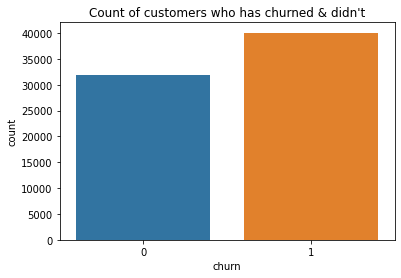

In [ ]:
plt.title("Count of customers who has churned & didn't")
sns.countplot(x = 'churn' ,  data = data);

In [ ]:
print('Percentage of Churn & Not Churn Customer:')
print(data['churn'].value_counts()/len(data)*100)

Percentage of Churn & Not Churn Customer:
1    55.707788
0    44.292212
Name: churn, dtype: float64


The count of people who have already churned is more. There is imbalance in the data with 40050 who has churned & 31843 who didn't churned.

In [ ]:
sub = data[["is_tv_subscriber","is_movie_package_subscriber"]].sum()
sub

is_tv_subscriber               58609
is_movie_package_subscriber    24017
dtype: int64

In [ ]:
data.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts()

is_tv_subscriber  is_movie_package_subscriber
0                 0                              13282
                  1                                  2
1                 0                              34594
                  1                              24015
Name: is_movie_package_subscriber, dtype: int64

Customers with tv subscription are more compared to movie package subscribers.
We can see only 2 customers opted for movie only package otherwise people who opted for movie package also has tv subscription.
Customers who didn't opted for both tv & movie subscription include 13282. Customers who opted for both tv & movie include 24015.

___Is Tv subscribers causing churn?___

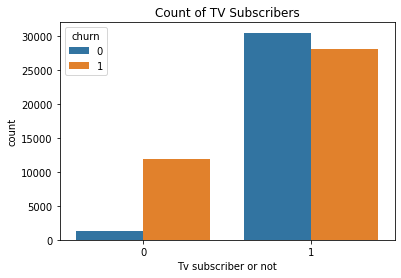

In [ ]:
plt.title("Count of TV Subscribers")
ax = sns.countplot(x = 'is_tv_subscriber', hue='churn', data = data)
ax.set(xlabel='Tv subscriber or not');

**The customers who subsribed to TV service are tends to not churn compared to customers who didn't subscribed to TV service**


**Is movie subscribers causing churn?**

[Text(0.5, 0, 'Movie subscriber or not')]

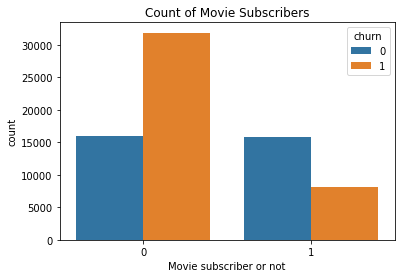

In [ ]:
plt.title("Count of Movie Subscribers")
ax = sns.countplot(x = 'is_movie_package_subscriber', hue='churn', data = data)
ax.set(xlabel='Movie subscriber or not')

**Movie package subscribers are less likely to churn than those who didn't subscribed to the service**

In [ ]:
subscriber_churn = data.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['churn']].sum()
subscriber_churn.reset_index(inplace=True)
subscriber_churn

,is_tv_subscriber,is_movie_package_subscriber,churn
0,0,0,11964
1,0,1,2
2,1,0,19891
3,1,1,8193


**We can see that customers who have opted for both tv & movie subscription have less churn rate.
Customers who do not have subscriptions & also customers with tv subscription only has higher churn rate**

**Do customers churn less with higher subscription years?**

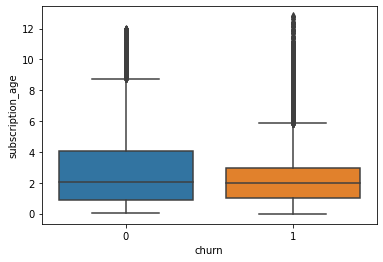

In [ ]:
sns.boxplot(x="churn",y="subscription_age",data=data)
plt.show()

**We can see that the most of the customers who has not churned has subscription age lies between 1 to 4 years & there are some higher subscription age who has not churned.
But for the customers who has churned subscription age lies between 1.5 to 3 years & there are exceptions with customers having high subscription age causing churn. Mostly, customers try to leave the service before 3 years**

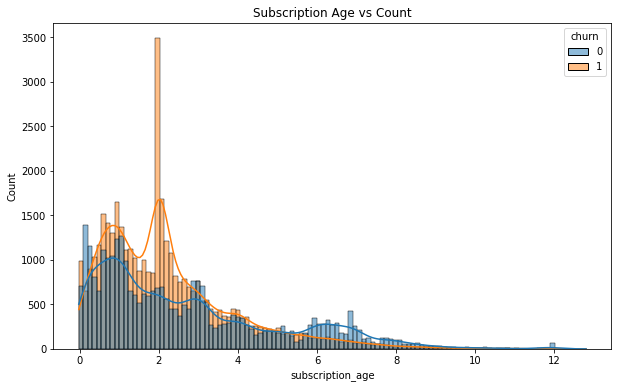

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data = data, x= 'subscription_age', kde = True, hue = 'churn') # noted data = pd.dataframe kita 
plt.title('Subscription Age vs Count')
plt.show()

**Subscription age mostly lies in 0 to 4 years & customers with high subscription age are less. The churn rate is also higher in the 0 to 4 years subscription age. So, subscription_age is a important factor in churn prediction.**

**Is the customers bill average caused effect on churn rate?**

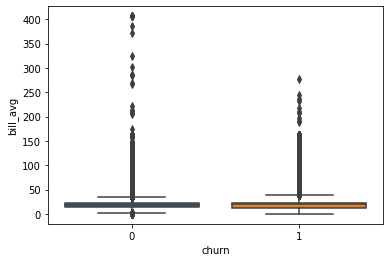

In [ ]:
sns.boxplot(x="churn",y="bill_avg",data=data) # noted data = pd.dataframe kita
plt.show() 


**Bill average most of it's values lies in between 10 to 40 dollars for customers who churn and who do not churn. There are exceptions with higher bill average customers being non - churner & also higher bill average customers being churners**

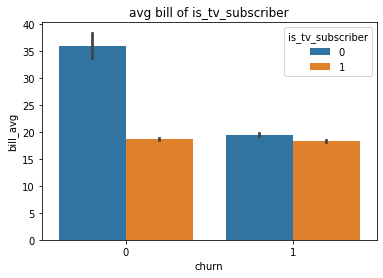

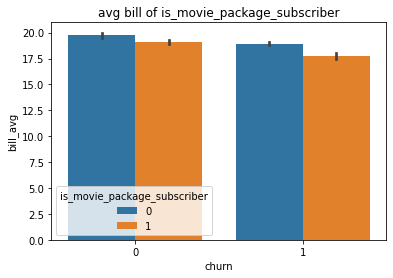

In [ ]:
# from IPython.core.pylabtools import figsize
subscribers=["is_tv_subscriber","is_movie_package_subscriber"]
for i in subscribers:
    sns.barplot(x="churn",y="bill_avg",data=data,hue=i)
    plt.title("avg bill of "+ i)
    plt.show()

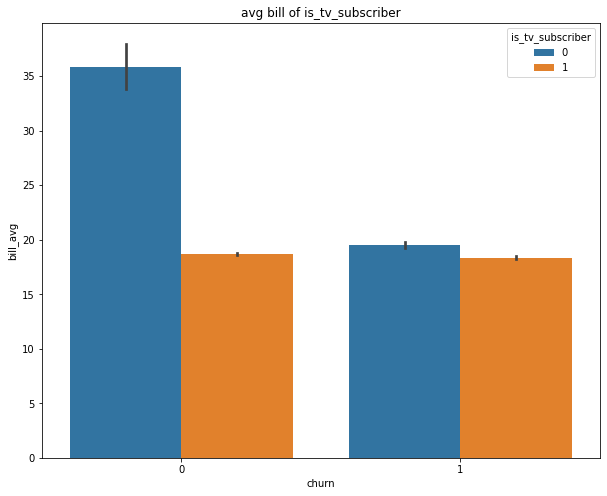

In [ ]:
plt.figure (figsize = (10,8))
sns.barplot(x="churn",y="bill_avg",data=data,hue='is_tv_subscriber')
plt.title('avg bill of is_tv_subscriber')
plt.show()

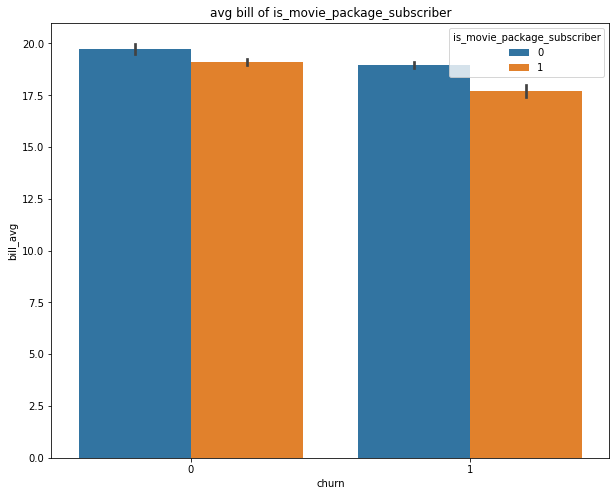

In [ ]:
plt.figure (figsize = (10,8))
sns.barplot(x="churn",y="bill_avg",data=data,hue='is_movie_package_subscriber')
plt.title('avg bill of is_movie_package_subscriber')
plt.show()

In [ ]:
bill_churn = data.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['bill_avg','churn']].sum()
bill_churn.reset_index(inplace=True)
bill_churn

,is_tv_subscriber,is_movie_package_subscriber,bill_avg,churn
0,0,0,280632,11964
1,0,1,28,2
2,1,0,639313,19891
3,1,1,447205,8193


**The customers who didn't have any subscription has lower average bill but still had a good amount of churn.** 

**The customers who only has tv subscription has higher average bill with highest churn rate.**  

**Customers with both subscription has the lowest churn rate.
Thus, Bill average overall can be considered a factor which can cause the customer to churn**

**Is remaining contract effects churn rate?**

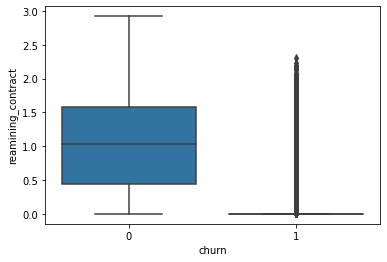

In [ ]:
sns.boxplot(x="churn",y="reamining_contract",data=data)
plt.show() 

**We find that customers who have no contract are the ones who churn because if they cancel while in contract they have to pay penalty. There are exceptions with customers who had contract but still churned.
Thus, remaining contract is a important factor in churn prediction.**

**Does contract selection cause churn?**

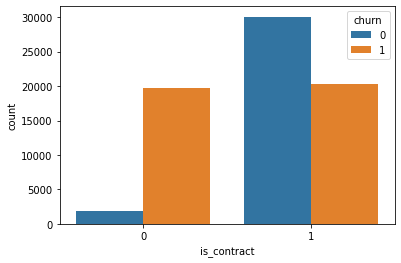

In [ ]:
sns.countplot(x = 'is_contract', hue='churn', data = data)
plt.show()

**Customers opted for contract are compared to non - contract. Churn is 
higher for people who do not have contract.**

In [ ]:
contract_churn = data.groupby(['is_contract'])[['churn']].count()
contract_churn.reset_index(inplace=True)
contract_churn

,is_contract,churn
0,0,21518
1,1,50375


**Customers opted for contract are more compared to non - contract. Churn is higher for people who do have contract's. This can be related to customers whose contracts are about to end or ended opting to churn**

**Do customers having service failure causing churn?**

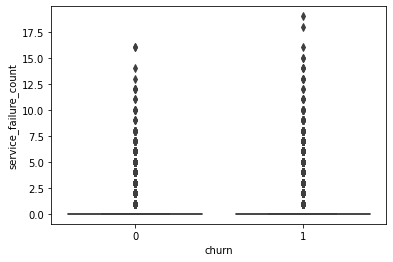

In [ ]:
sns.boxplot(x="churn",y="service_failure_count",data=data)
plt.show() 

**Customers with higher service failure calls have churned but we can also see the customer who also have high service failure calls has no churn.
But overall if service failure counts do go high it can lead the customer to quit the service.**

**Is download average of customers causing churn?**

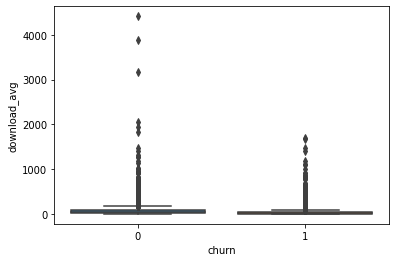

In [ ]:
sns.boxplot(x="churn",y="download_avg",data=data)
plt.show() 

**The download_average doesn't seem to be a factor in churn prediction**

**Is upload average of customers causing churn?**

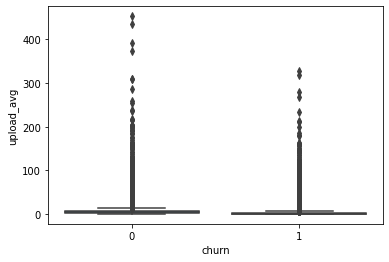

In [ ]:
sns.boxplot(x="churn",y="upload_avg",data=data)
plt.show() 

The upload_average doesn't seem to be a factor in churn prediction

In [ ]:
data_usage =  data.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['download_avg','upload_avg','churn']].sum()
data_usage.reset_index(inplace=True)
data_usage

,is_tv_subscriber,is_movie_package_subscriber,download_avg,upload_avg,churn
0,0,0,347380.1,37656.9,11964
1,0,1,83.2,5.7,2
2,1,0,1399045.1,131995.1,19891
3,1,1,1394490.4,131723.2,8193


The data shows the customers with tv subscription & both tv and movie subscription has the highest data usage.

**Is customers doing download over limit leading to churn?**

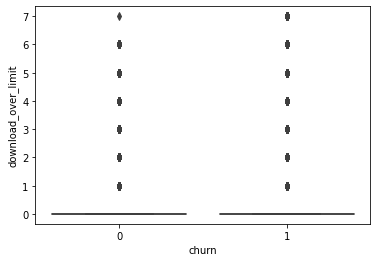

In [ ]:
sns.boxplot(x="churn",y="download_over_limit",data=data)
plt.show() 

In reality, customers will be real careful about download over limit & also receive warnings if they reach the limit.
Also, in the graph we cannot see relation between download over limit & churn

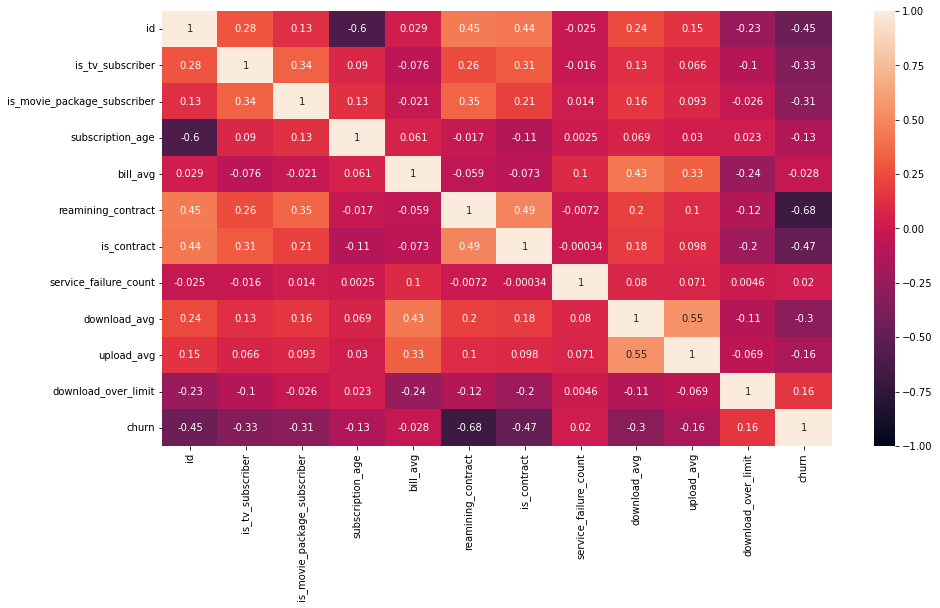

In [ ]:
correlation = data.corr()
plt.figure(figsize=(15,8))

sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

We can see from the heatmap service_failure_count & download_over_limit shows the highest correlation with churn.

In [ ]:
data.corr()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
id,1.000000,0.283385,0.131648,-0.598800,0.028724,0.447058,0.436729,-0.024655,0.241278,0.145936,-0.229176,-0.448660
is_tv_subscriber,0.283385,1.000000,0.337044,0.089993,-0.076198,0.257424,0.310062,-0.016023,0.131650,0.065791,-0.103807,-0.329417
is_movie_package_subscriber,0.131648,0.337044,1.000000,0.134534,-0.021231,0.345525,0.208607,0.013804,0.160590,0.093251,-0.026187,-0.307789
subscription_age,-0.598800,0.089993,0.134534,1.000000,0.060931,-0.016847,-0.110484,0.002528,0.069331,0.030277,0.023295,-0.126672
bill_avg,0.028724,-0.076198,-0.021231,0.060931,1.000000,-0.059421,-0.072933,0.099885,0.431674,0.334236,-0.235033,-0.027550
reamining_contract,0.447058,0.257424,0.345525,-0.016847,-0.059421,1.000000,0.488510,-0.007213,0.203305,0.103783,-0.120200,-0.681629
is_contract,0.436729,0.310062,0.208607,-0.110484,-0.072933,0.488510,1.000000,-0.000336,0.180958,0.098431,-0.204453,-0.472771
service_failure_count,-0.024655,-0.016023,0.013804,0.002528,0.099885,-0.007213,-0.000336,1.000000,0.080483,0.070699,0.004582,0.019680
download_avg,0.241278,0.131650,0.160590,0.069331,0.431674,0.203305,0.180958,0.080483,1.000000,0.554436,-0.114322,-0.298063
upload_avg,0.145936,0.065791,0.093251,0.030277,0.334236,0.103783,0.098431,0.070699,0.554436,1.000000,-0.069192,-0.162690


##**Clustering**

In [ ]:
data.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.189300e+04,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000
mean,8.432896e+05,0.815225,0.334066,2.455486,19.016844,0.497612,0.700694,0.275674,43.689911,4.192076,0.208713,0.557078
std,4.871708e+05,0.388117,0.471666,2.026856,13.188541,0.665755,0.457957,0.818533,63.405963,9.818896,0.999647,0.496735
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.211420e+05,1.000000,0.000000,0.940000,13.000000,0.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.447570e+05,1.000000,0.000000,1.980000,19.000000,0.000000,1.000000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.264775e+06,1.000000,1.000000,3.300000,22.000000,1.030000,1.000000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,1.000000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [ ]:
data_d = data.copy()

In [ ]:
Q1 = data_d['bill_avg'].quantile(.25)
Q3 = data_d['bill_avg'].quantile(.75)
IQR = Q3-Q1

LIF = Q1 - 1.5*IQR
UIF = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(LIF)
print(UIF)

13.0
22.0
9.0
-0.5
35.5


In [ ]:
data_d = data_d[(data_d['bill_avg'] >= LIF) & (data_d['bill_avg'] <= UIF)]
data_d.reset_index(drop=True, inplace=True)
data_d

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,1,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,1,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,0,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68527,1689648,1,1,0.09,0,1.25,1,0,0.0,0.0,0,1
68528,1689676,1,0,0.06,1,1.63,1,0,0.8,0.0,0,1
68529,1689679,1,0,0.02,0,2.19,1,0,1.5,0.2,0,1
68530,1689733,0,0,0.01,0,0.72,1,0,0.0,0.0,0,1


In [ ]:
data_d.bill_avg.mean()

17.239785793497926

In [ ]:
data_d = data_d[~(data_d['bill_avg'] == 0)]

In [ ]:
data_cluster = data_d.copy()
data_cluster

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,1,0,8.4,2.3,0,0
2,23,1,0,8.91,16,0.00,1,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,0,1,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,1,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,1,0,21.3,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68520,1689476,0,0,0.00,1,0.61,1,0,0.0,0.0,0,1
68523,1689546,1,0,0.00,1,0.32,1,0,0.0,0.0,0,1
68524,1689554,1,1,0.04,7,1.93,1,1,5.8,0.9,0,1
68526,1689642,1,0,0.04,11,0.37,1,0,0.0,0.0,0,1


In [ ]:
data_cluster.drop(['id'],axis=1, inplace = True)
data_cluster

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,1,0,8.4,2.3,0,0
2,1,0,8.91,16,0.00,1,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,0,1,0.0,0.0,0,1
5,1,1,11.94,32,1.38,1,0,69.4,4.0,0,0
6,0,0,8.96,18,0.00,1,0,21.3,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
68520,0,0,0.00,1,0.61,1,0,0.0,0.0,0,1
68523,1,0,0.00,1,0.32,1,0,0.0,0.0,0,1
68524,1,1,0.04,7,1.93,1,1,5.8,0.9,0,1
68526,1,0,0.04,11,0.37,1,0,0.0,0.0,0,1


In [ ]:
data_cluster[data_cluster['bill_avg'] == 0]

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


In [ ]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63636 entries, 0 to 68528
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             63636 non-null  int64  
 1   is_movie_package_subscriber  63636 non-null  int64  
 2   subscription_age             63636 non-null  float64
 3   bill_avg                     63636 non-null  int64  
 4   reamining_contract           63636 non-null  float64
 5   is_contract                  63636 non-null  int64  
 6   service_failure_count        63636 non-null  int64  
 7   download_avg                 63636 non-null  float64
 8   upload_avg                   63636 non-null  float64
 9   download_over_limit          63636 non-null  int64  
 10  churn                        63636 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 5.8 MB


In [ ]:
numerical_column = ['subscription_age','bill_avg','reamining_contract','download_avg','upload_avg','service_failure_count','download_over_limit']
numerical_column

['subscription_age',
 'bill_avg',
 'reamining_contract',
 'download_avg',
 'upload_avg',
 'service_failure_count',
 'download_over_limit']

In [ ]:
scaler = MinMaxScaler()
data_cluster[numerical_column] = scaler.fit_transform(data_cluster[numerical_column])
data_cluster

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,0.936520,0.705882,0.047945,1,0.0000,0.006656,0.005074,0.0,0
2,1,0,0.698276,0.441176,0.000000,1,0.0000,0.010855,0.001985,0.0,1
3,0,0,0.538401,0.588235,0.000000,0,0.0625,0.000000,0.000000,0.0,1
5,1,1,0.935737,0.911765,0.472603,1,0.0000,0.054988,0.008824,0.0,0
6,0,0,0.702194,0.500000,0.000000,1,0.0000,0.016877,0.004412,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
68520,0,0,0.000000,0.000000,0.208904,1,0.0000,0.000000,0.000000,0.0,1
68523,1,0,0.000000,0.000000,0.109589,1,0.0000,0.000000,0.000000,0.0,1
68524,1,1,0.003135,0.176471,0.660959,1,0.0625,0.004596,0.001985,0.0,1
68526,1,0,0.003135,0.294118,0.126712,1,0.0000,0.000000,0.000000,0.0,1


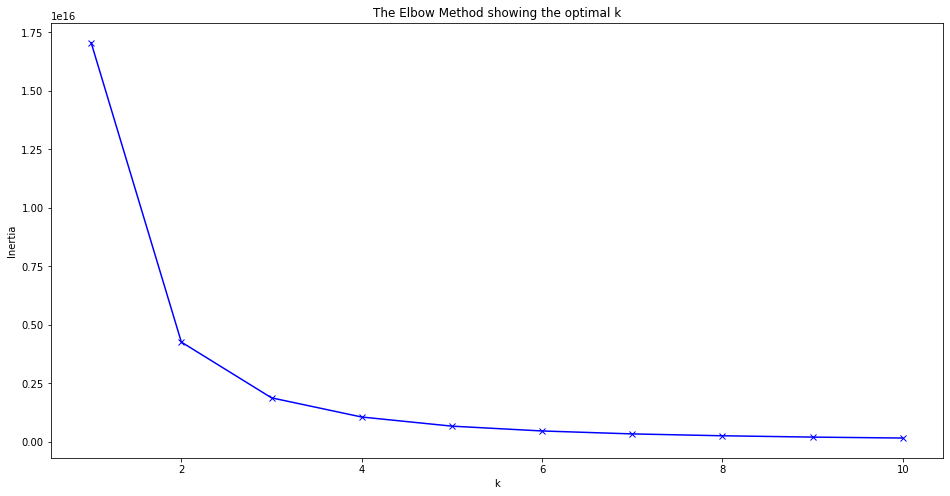

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from silhoutte import silhoutte_analysis
silhoutte_analysis(data,list(range(2,4)))

ModuleNotFoundError: ignored

In [ ]:
cluster_model = cluster.KMeans(n_clusters=2)
cluster_model.fit(data_cluster)
cluster_label = cluster_model.labels_
data_cluster['cluster'] = cluster_label
data_cluster

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,cluster
0,1,0,0.936520,0.705882,0.047945,1,0.0000,0.006656,0.005074,0.0,0,1
2,1,0,0.698276,0.441176,0.000000,1,0.0000,0.010855,0.001985,0.0,1,0
3,0,0,0.538401,0.588235,0.000000,0,0.0625,0.000000,0.000000,0.0,1,0
5,1,1,0.935737,0.911765,0.472603,1,0.0000,0.054988,0.008824,0.0,0,1
6,0,0,0.702194,0.500000,0.000000,1,0.0000,0.016877,0.004412,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68520,0,0,0.000000,0.000000,0.208904,1,0.0000,0.000000,0.000000,0.0,1,0
68523,1,0,0.000000,0.000000,0.109589,1,0.0000,0.000000,0.000000,0.0,1,0
68524,1,1,0.003135,0.176471,0.660959,1,0.0625,0.004596,0.001985,0.0,1,1
68526,1,0,0.003135,0.294118,0.126712,1,0.0000,0.000000,0.000000,0.0,1,0


In [ ]:
data_1 = data_d.copy()
data_1['cluster'] = cluster_label
data_1

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,cluster
0,15,1,0,11.95,25,0.14,1,0,8.4,2.3,0,0,1
2,23,1,0,8.91,16,0.00,1,0,13.7,0.9,0,1,0
3,27,0,0,6.87,21,0.00,0,1,0.0,0.0,0,1,0
5,56,1,1,11.94,32,1.38,1,0,69.4,4.0,0,0,1
6,71,0,0,8.96,18,0.00,1,0,21.3,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68520,1689476,0,0,0.00,1,0.61,1,0,0.0,0.0,0,1,0
68523,1689546,1,0,0.00,1,0.32,1,0,0.0,0.0,0,1,0
68524,1689554,1,1,0.04,7,1.93,1,1,5.8,0.9,0,1,1
68526,1689642,1,0,0.04,11,0.37,1,0,0.0,0.0,0,1,0


In [ ]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
data_1.groupby('cluster')['churn','is_tv_subscriber','bill_avg','is_contract','download_avg','download_over_limit','reamining_contract'].agg(['mean','median','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


churn            is_tv_subscriber              bill_avg         \
             mean median min             mean median min       mean median   
cluster                                                                      
0        0.990137    1.0   0         0.718559    1.0   0  19.282845   20.0   
1        0.002021    0.0   0         0.975477    1.0   0  17.771507   17.0   

            is_contract  ...     download_avg             download_over_limit  \
        min        mean  ... min         mean median  min                mean   
cluster                  ...                                                    
0         1    0.539241  ...   0    26.724435   14.8  0.0            0.096264   
1         1    0.962652  ...   0    60.371911   47.4  0.0            0.028002   

                   reamining_contract              
        median min               mean median  min  
cluster                                            
0          0.0   0           0.095631   0.00  0.0  
1          0.0   0           1.032372   1.05  0.0  

[2 rows x 21 columns]

*Cluster 1*: **Sultan**: with median of internet speed 47.4 Mbps and never over limit presumably due to their big internet quotas, they spent average of USD 17.7 per month. They also opted for contract package with the average of remaining contract 1 year, making them a non churn customers.

---

*Cluster 2*: **Rakyat jelata**: with median of internet speed 11.3 Mbps and they spent average of USD 16.9 per month with a non-contract package, making them a churn customers.

In [ ]:
data_1.groupby('cluster')['id'].agg(['count'])

,count
cluster,
0,33460
1,30176


#**Logistic Regression Modeling**

In [ ]:
x = data_d[['is_tv_subscriber','download_avg','is_contract','reamining_contract']]
y  = data_d['churn']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=2)

In [ ]:
LogitModel = LogisticRegression()

In [ ]:
model = LogitModel.fit(xTrain,yTrain)

In [ ]:
predictions = model.predict(xTrain)
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(yTrain, predictions))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.82      0.86     24441
           1       0.85      0.91      0.88     26467

    accuracy                           0.87     50908
   macro avg       0.87      0.87      0.87     50908
weighted avg       0.87      0.87      0.87     50908



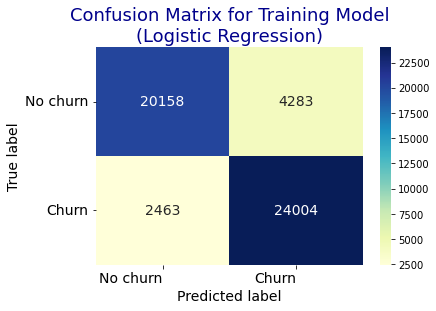

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(yTrain, predictions)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

We can see that our training model prediction have the accuracy of 0.87 and recall= 0.91 with details:
Predicted churn true positive as much as 23999 users, no churn true negative 20166, and false negative no churn when they actually churn 2468.

In [ ]:
test_pred = model.predict(xTest)
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(yTest, test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      6004
           1       0.85      0.91      0.88      6724

    accuracy                           0.87     12728
   macro avg       0.87      0.86      0.86     12728
weighted avg       0.87      0.87      0.86     12728



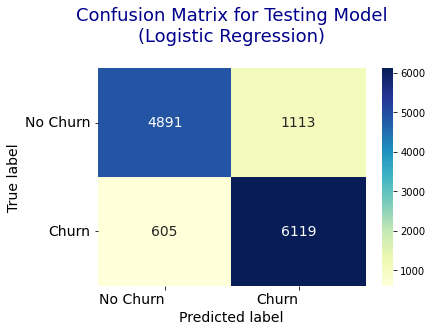

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(yTest, test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

We can see that our testing model prediction have the accuracy of 0.86 and recall= 0.91 with details:
Predicted churn true positive as much as 6117 users, no churn true negative 4889, and false negative no churn when they actually churn 607.

To avoid error in the recommendations regarding churn customer, we decided that an error in predicting the positive classes (churn) need to be avoided. Thus, we decided that **recall score** is the best metrics to evaluate our model.  
With recall score = **0.92** we can say that our model is good in predicting positive classes.

In [ ]:
model_pred = pd.DataFrame(predictions, columns=['Churn_Pred'])
model_pred

,Churn_Pred
0,1
1,1
2,1
3,1
4,0
...,...
50903,1
50904,0
50905,1
50906,0


In [ ]:
xTest.reset_index(drop=True, inplace=True)
xTest

,is_tv_subscriber,download_avg,is_contract,reamining_contract
0,1,15.2,1,0.00
1,1,0.0,1,0.00
2,1,5.5,1,0.00
3,1,20.7,0,0.00
4,0,0.0,0,0.00
...,...,...,...,...
12723,0,0.0,1,0.00
12724,1,37.7,1,1.30
12725,1,26.9,1,1.63
12726,1,122.3,1,1.84


In [ ]:
data_pred = xTest.merge(model_pred, left_index = True, right_index = True)
data_pred

,is_tv_subscriber,download_avg,is_contract,reamining_contract,Churn_Pred
0,1,15.2,1,0.00,1
1,1,0.0,1,0.00,1
2,1,5.5,1,0.00,1
3,1,20.7,0,0.00,1
4,0,0.0,0,0.00,0
...,...,...,...,...,...
12723,0,0.0,1,0.00,1
12724,1,37.7,1,1.30,0
12725,1,26.9,1,1.63,1
12726,1,122.3,1,1.84,0


In [ ]:
yTest

32840    1
19401    1
43864    1
13237    1
1015     1
        ..
26837    1
61409    0
45845    0
66595    0
37737    0
Name: churn, Length: 12728, dtype: int64

In [ ]:
#Convert yTest into dataframe 
churn_data =  yTest.to_frame()
churn_data

,churn
32840,1
19401,1
43864,1
13237,1
1015,1
...,...
26837,1
61409,0
45845,0
66595,0


In [ ]:
#Reset index of churn_data
churn_data.reset_index(drop = True, inplace=True)
churn_data

,churn
0,1
1,1
2,1
3,1
4,1
...,...
12723,1
12724,0
12725,0
12726,0


In [ ]:
#Merging logistic regression data (yTest, Predictions result, and yTest)
data_pred_fin = data_pred.merge(churn_data, left_index = True, right_index = True)
data_pred_fin

,is_tv_subscriber,download_avg,is_contract,reamining_contract,Churn_Pred,churn
0,1,15.2,1,0.00,1,1
1,1,0.0,1,0.00,1,1
2,1,5.5,1,0.00,1,1
3,1,20.7,0,0.00,1,1
4,0,0.0,0,0.00,0,1
...,...,...,...,...,...,...
12723,0,0.0,1,0.00,1,1
12724,1,37.7,1,1.30,0,0
12725,1,26.9,1,1.63,1,0
12726,1,122.3,1,1.84,0,0


In [ ]:
chrn = data_d.query('churn == 1')
chrn

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
2,23,1,0,8.91,16,0.00,1,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,0,1,0.0,0.0,0,1
6,71,0,0,8.96,18,0.00,1,0,21.3,2.0,0,1
7,84,0,0,5.48,14,0.00,0,1,0.0,0.0,0,1
10,166,1,1,8.44,17,0.00,1,0,9.9,1.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68520,1689476,0,0,0.00,1,0.61,1,0,0.0,0.0,0,1
68523,1689546,1,0,0.00,1,0.32,1,0,0.0,0.0,0,1
68524,1689554,1,1,0.04,7,1.93,1,1,5.8,0.9,0,1
68526,1689642,1,0,0.04,11,0.37,1,0,0.0,0.0,0,1


In [ ]:
data_d['is_contract'].value_counts()/len(data_d)*100

1    74.002137
0    25.997863
Name: is_contract, dtype: float64

In [ ]:
chrn['is_contract'].value_counts()/len(chrn)*100

1    54.544907
0    45.455093
Name: is_contract, dtype: float64

In [ ]:
len(chrn)/len(data_d)*100

52.157583757621474

In [ ]:
chrn['download_avg'].agg(['mean','median'])

mean      26.619213
median    14.700000
Name: download_avg, dtype: float64

In [ ]:
chrn.shape[0]

33191

In [ ]:
chrn = chrn[['is_tv_subscriber','download_avg','is_contract', 'reamining_contract']]

In [ ]:
#test_d.drop(['id', 'download_over_limit', 'churn', 'upload_avg', 'subscription_age', 'bill_avg', 'service_failure_count'], axis=1, inplace=True)

In [ ]:
churn_predictions = model.predict(chrn)

In [ ]:
predict_result = pd.DataFrame(churn_predictions,columns=['Churn_Predicts'])
predict_result.value_counts()

Churn_Predicts
1                 30123
0                  3068
dtype: int64

In [ ]:
len(predict_result.query('Churn_Predicts == 1'))/len(chrn)*100

90.75653038474285

With median of 14.7 Mbps, the model predict that 91.68% of our customers will churn.

In [ ]:
non_churn = data_d.query('churn == 0')
non_churn.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,3.044500e+04,30445.000000,30445.000000,30445.000000,30445.000000,30445.000000,30445.000000,30445.000000,30445.000000,30445.000000,30445.000000,30445.0
mean,1.086442e+06,0.964855,0.499195,2.752755,17.843127,1.019388,0.952143,0.242371,60.189328,5.392978,0.032222,0.0
std,4.401435e+05,0.184150,0.500008,2.335795,5.720907,0.618703,0.213467,0.713363,50.602597,9.154267,0.327404,0.0
min,1.500000e+01,0.000000,0.000000,0.020000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,8.106790e+05,1.000000,0.000000,0.900000,13.000000,0.470000,1.000000,0.000000,25.400000,1.900000,0.000000,0.0
50%,1.182757e+06,1.000000,0.000000,2.070000,18.000000,1.050000,1.000000,0.000000,47.300000,3.600000,0.000000,0.0
75%,1.453610e+06,1.000000,1.000000,4.050000,22.000000,1.590000,1.000000,0.000000,80.600000,6.400000,0.000000,0.0
max,1.674267e+06,1.000000,1.000000,11.950000,35.000000,2.920000,1.000000,16.000000,1262.100000,453.300000,7.000000,0.0


In [ ]:
non_churn.is_tv_subscriber.value_counts()/len(non_churn)*100

1    96.485466
0     3.514534
Name: is_tv_subscriber, dtype: float64

In [ ]:
test_d = chrn.copy()
test_d['download_avg'].agg(['min','mean', 'median'])

min        0.000000
mean      26.619213
median    14.700000
Name: download_avg, dtype: float64

In [ ]:
test_d = test_d[['is_tv_subscriber','download_avg','is_contract', 'reamining_contract']]

In [ ]:
test_d.is_tv_subscriber.value_counts()/len(test_d)*100

1    72.622096
0    27.377904
Name: is_tv_subscriber, dtype: float64

In [ ]:
test_d.is_contract.value_counts()/len(test_d)*100

1    54.544907
0    45.455093
Name: is_contract, dtype: float64

In [ ]:
test_d.reamining_contract.agg(['mean','median'])

mean      0.099949
median    0.000000
Name: reamining_contract, dtype: float64

In [ ]:
#Modify the download avg value
test_d['download_avg'] = 47
test_d['download_avg'].agg(['mean','median'])

mean      47.0
median    47.0
Name: download_avg, dtype: float64

In [ ]:
test_d['is_contract'] = 1
test_d['is_contract'].value_counts()/len(test_d)*100

1    100.0
Name: is_contract, dtype: float64

In [ ]:
test_d['reamining_contract'] = 0.5
test_d['reamining_contract'].agg(['mean', 'median'])

mean      0.5
median    0.5
Name: reamining_contract, dtype: float64

In [ ]:
#test_d.is_tv_subscriber = 1
test_d.is_tv_subscriber.value_counts()/len(test_d)*100

1    72.622096
0    27.377904
Name: is_tv_subscriber, dtype: float64

In [ ]:
modif_pred = model.predict(test_d)

In [ ]:
mod_predict_result = pd.DataFrame(modif_pred,columns=['Churn_Predict'])
mod_predict_result.value_counts()

Churn_Predict
0                24104
1                 9087
dtype: int64

In [ ]:
len(mod_predict_result.query('Churn_Predict == 1'))/len(data_d)*100

14.279653026588724

In [ ]:
data_d.query('churn == 0').reamining_contract.agg(['mean', 'median'])

mean      1.019388
median    1.050000
Name: reamining_contract, dtype: float64

In [ ]:
data_d.is_contract.value_counts()/len(data_d)

1    0.740021
0    0.259979
Name: is_contract, dtype: float64

In [ ]:
data_d.is_tv_subscriber.value_counts()/len(data_d)

1    0.840389
0    0.159611
Name: is_tv_subscriber, dtype: float64

In [ ]:
data_d.churn.value_counts()/len(data_d)*100

1    52.157584
0    47.842416
Name: churn, dtype: float64

#**Recommendations**

 **Given the insights gained, the company can take some steps to help reduce churn rate:**

- Increase internet speed (download_avg) to minimum of 47.5 Mbps (reduce customers churn by 4%)
- Offer promotions to customers who do not have contracts (they are most likely to churn) to switch to contract with minimum of 6 month period (reduce churn rate by 22.5% | 55.4% to 32.9%) or to 1 year contract (reduce churn rate by 44.88% | 55.4% to 10.5% churn rate).
- Create 3 promotional/service bundling:  
   - Bundling 1: non-contract internet service with internet speed min. 47.5 Mbps and TV/Movie subscription (reduce churn by 4%)
   - Bundling 2: get all of the bundling 1 with contract package of 6 month period (reduce churn by 22.5%)
   - Bundling 3: get all of the bundling 2 with contract package of 1 year period (reduce churn by 44.88%)
- Reduce service failures to avoid customers from churning.
- Provide discounts to high subscription age customers.


